# Community Earth System Model v2 Large Ensemble (CESM2-LE) on AWS

## Overview

The [National Center for Atmospheric Research](https://ncar.ucar.edu/) partnered with  the [IBS Center for Climate Physics in South Korea](https://ibsclimate.org/) to generate the CESM2 Large Ensemble which consists of 100 members at 1 degree spatial resolution covering the period 1850-2100 under CMIP6 historical and SSP370 future radiative forcing scenarios. Data sets from this ensemble were made available via the Climate Data Gateway on June 14th, 2021.

### Acknowledgement

When presenting results based on the CESM2 Large Ensemble in either oral or written form, please acknowledge the CESM2 Large Ensemble Community Project and supercomputing resources provided by the IBS Center for Climate Physics in South Korea, and reference the [DOI](https://eartharxiv.org/repository/view/2444/) of the [Rodgers et al. (2021) - preprint](https://eartharxiv.org/repository/view/2444/).


### Experiment Explanation

As part of the CESM2 Large Ensemble project, it was decided to use two separate sets of biomass burning emissions forcing files, with the first 50 members having been forced with CMIP6 protocols identical to those used in Danabasoglu et al. (2020) in the presentation paper for CESM2. For the second set of 50 ensemble members, the pertinent species for biomass burning fluxes from the CMIP6 protocols were smoothed with an 11-year running mean filter, impacting the fluxes over the years 1990-2020. The first set of 50 ensemble members is denoted CMIP6, and the second set of 50 SMBB, for smoothed biomass burning. All smoothing was done only after projecting fields onto the CESM2 grid. The biomass burning fluxes are represented in Fig. S2, and the difference in ensemble mean response in Northern Hemisphere sea ice and surface temperature in Fig. S3, of the preprint of the presentation paper. The enhanced biomass burning for the CMIP6 versus SMBB groupings has an impact on large-scale climate over 1990-2020, as indicated through the acceleration of Arctic sea ice loss during September as well as through warming over the Northern Hemisphere and the tropical Pacific.

Unlike the [CESM1 Large Ensemble](https://www.cesm.ucar.edu/projects/community-projects/LENS1/), the [CESM2 Large Ensemble](https://www.cesm.ucar.edu/projects/community-projects/LENS2/) uses a combination of different oceanic and atmospheric initial states to create ensemble spread as follows.

### Ensemble Member Description

1. Members 1-10: These will begin from years 1001, 1021, 1041, 1061, 1081, 1101, 1121, 1141, 1161, and 1181 of the 1400-year pre-industrial control simulation. This segment of the control simulation was chosen to minimize drift.

2. Members 11-90: These begin from 4 pre-selected years of the pre-industrial control simulation based on the phase of the Atlantic Meridional Overturning Circulation (AMOC). For each of the 4 initial states, there will be 20 ensemble members created by randomly perturbing the atmospheric temperature field by order 10^-14K. The chosen start dates (model years 1231, 1251, 1281, and 1301) sample AMOC and Sea Surface Height (SSH) in the Labrador Sea at their maximum, minimum and transition states.

3. Members 91-100: These will begin from years 1011, 1031, 1051, 1071, 1091, 1111, 1131, 1151, 1171, and 1191 of the 1400-year pre-industrial control simulation. This set will include the extensive "MOAR" output, which can be used to drive regional climate models.

The initialization design will allow assessment of oceanic (AMOC) and atmospheric contributions to ensemble spread, and the impact of AMOC initial-condition memory on the global earth system.

Here are a couple of graphics from the official CESM2-LE Documentation, helping to illustrate the experiment design.

![CESM2-LE-image1](images/CESM2LE_1.png)
![CESM2-LE-image2](images/CESM2LE_2.png)

### Visual Representation of the Ensemble
Here is a visual representation of the ensemble, focusing on the SSP370 future scenario, there is also a matching historical experiment with an identical experiment numbers and forcings.

Here, experiment number is meant to represent the "model year" described above.

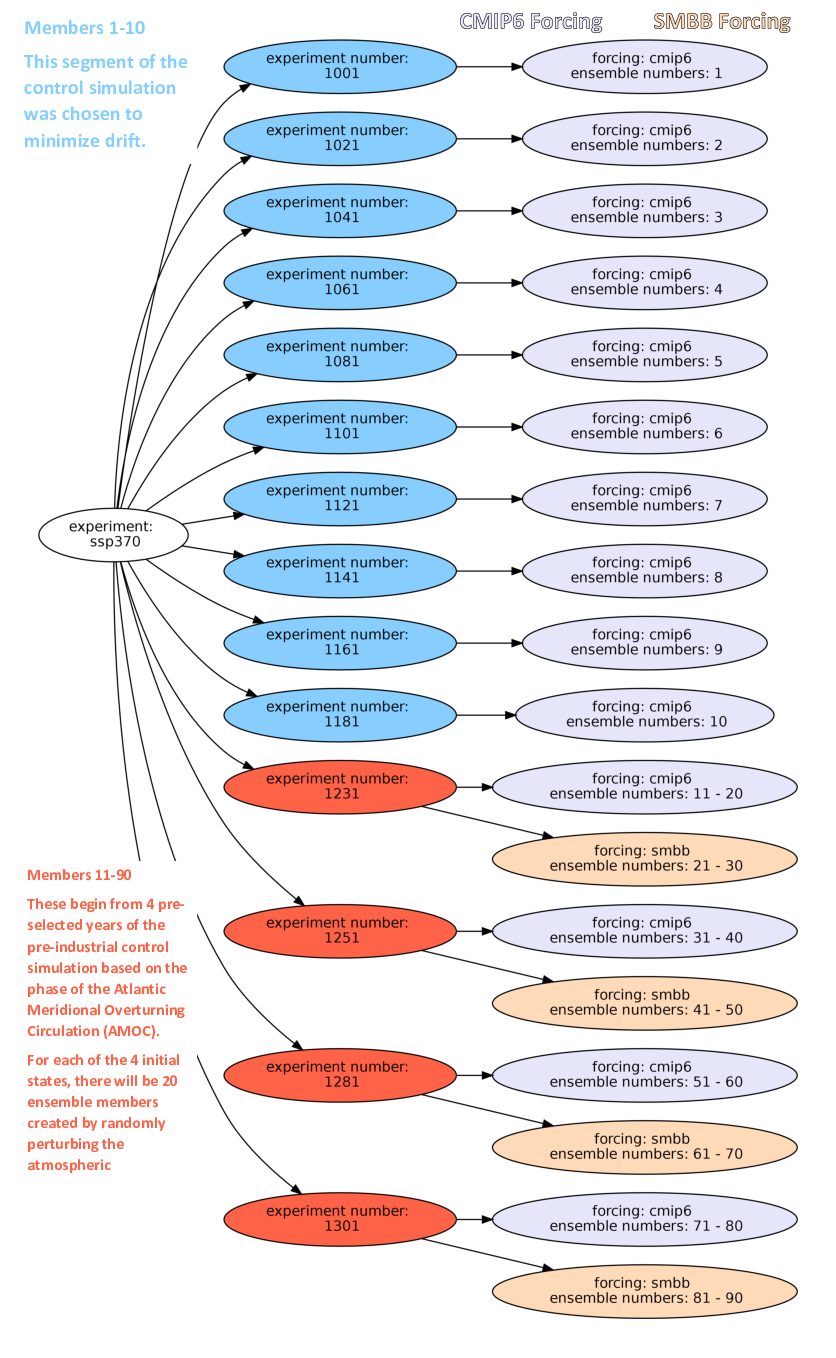

In [6]:
from wand.image import Image as WImage
img = WImage(filename='cesm2-le-documentation.pdf')
img

## How is the "`member_id`" Assembled?

Within this analysis ready, cloud native format, we use CMIP standard naming conventions for this dataset. Below are a couple of graphics describing the convention, and how we map from the `{control_branch_year}.{ensemble_number}` (ex. `1231.001`) syntax from above, to the CMIP standard.

![](images/cesm2_le_naming_1.png)
![](images/cesm2_le_naming_2.png)

### Adding a "Helper Function" to Map from Control Branch Year + Member Number to Member ID

Below is a sample function, written in Python, to help with mapping from one to the other! Feel free to use it in your analysis.

You will need to select the "plus" button here to expand it!

In [5]:
def add_cmip_member_id(member_id):
    member_id_mapping = {'1001.001':'r1i1001p1f1',
                         '1021.002':'r2i1021p1f1',
                         '1041.003':'r3i1041p1f1',
                         '1061.004':'r4i1061p1f1',
                         '1081.005':'r5i1081p1f1',
                         '1101.006':'r6i1101p1f1',
                         '1121.007':'r7i1121p1f1',
                         '1141.008':'r8i1141p1f1',
                         '1161.009':'r9i1161p1f1',
                         '1181.010':'r10i1181p1f1',
                         '1011.001':'r1i1011p1f2',
                         '1031.002':'r2i1031p1f2',
                         '1051.003':'r3i1051p1f2',
                         '1071.004':'r4i1071p1f2',
                         '1091.005':'r5i1091p1f2',
                         '1111.006':'r6i1111p1f2',
                         '1131.007':'r7i1131p1f2',
                         '1151.008':'r8i1151p1f2',
                         '1171.009':'r9i1171p1f2',
                         '1191.010':'r10i1191p1f2',
                         '1231.001':'r1i1231p1f1',
                         '1231.002':'r2i1231p1f1',
                         '1231.003':'r3i1231p1f1',
                         '1231.004':'r4i1231p1f1',
                         '1231.005':'r5i1231p1f1',
                         '1231.006':'r6i1231p1f1',
                         '1231.007':'r7i1231p1f1',
                         '1231.008':'r8i1231p1f1',
                         '1231.009':'r9i1231p1f1',
                         '1231.010':'r10i1231p1f1',
                         '1231.011':'r11i1231p1f2',
                         '1231.012':'r12i1231p1f2',
                         '1231.013':'r13i1231p1f2',
                         '1231.014':'r14i1231p1f2',
                         '1231.015':'r15i1231p1f2',
                         '1231.016':'r16i1231p1f2',
                         '1231.017':'r17i1231p1f2',
                         '1231.018':'r18i1231p1f2',
                         '1231.019':'r19i1231p1f2',
                         '1231.020':'r20i1231p1f2',
                         '1251.001':'r1i1251p1f1',
                         '1251.002':'r2i1251p1f1',
                         '1251.003':'r3i1251p1f1',
                         '1251.004':'r4i1251p1f1',
                         '1251.005':'r5i1251p1f1',
                         '1251.006':'r6i1251p1f1',
                         '1251.007':'r7i1251p1f1',
                         '1251.008':'r8i1251p1f1',
                         '1251.009':'r9i1251p1f1',
                         '1251.010':'r10i1251p1f1',
                         '1251.011':'r11i1251p1f2',
                         '1251.012':'r12i1251p1f2',
                         '1251.013':'r13i1251p1f2',
                         '1251.014':'r14i1251p1f2',
                         '1251.015':'r15i1251p1f2',
                         '1251.016':'r16i1251p1f2',
                         '1251.017':'r17i1251p1f2',
                         '1251.018':'r18i1251p1f2',
                         '1251.019':'r19i1251p1f2',
                         '1251.020':'r20i1251p1f2',
                         '1281.001':'r1i1281p1f1',
                         '1281.002':'r2i1281p1f1',
                         '1281.003':'r3i1281p1f1',
                         '1281.004':'r4i1281p1f1',
                         '1281.005':'r5i1281p1f1',
                         '1281.006':'r6i1281p1f1',
                         '1281.007':'r7i1281p1f1',
                         '1281.008':'r8i1281p1f1',
                         '1281.009':'r9i1281p1f1',
                         '1281.010':'r10i1281p1f1',
                         '1281.011':'r11i1281p1f2',
                         '1281.012':'r12i1281p1f2',
                         '1281.013':'r13i1281p1f2',
                         '1281.014':'r14i1281p1f2',
                         '1281.015':'r15i1281p1f2',
                         '1281.016':'r16i1281p1f2',
                         '1281.017':'r17i1281p1f2',
                         '1281.018':'r18i1281p1f2',
                         '1281.019':'r19i1281p1f2',
                         '1281.020':'r20i1281p1f2',
                         '1301.001':'r1i1301p1f1',
                         '1301.002':'r2i1301p1f1',
                         '1301.003':'r3i1301p1f1',
                         '1301.004':'r4i1301p1f1',
                         '1301.005':'r5i1301p1f1',
                         '1301.006':'r6i1301p1f1',
                         '1301.007':'r7i1301p1f1',
                         '1301.008':'r8i1301p1f1',
                         '1301.009':'r9i1301p1f1',
                         '1301.010':'r10i1301p1f1',
                         '1301.011':'r11i1301p1f2',
                         '1301.012':'r12i1301p1f2',
                         '1301.013':'r13i1301p1f2',
                         '1301.014':'r14i1301p1f2',
                         '1301.015':'r15i1301p1f2',
                         '1301.016':'r16i1301p1f2',
                         '1301.017':'r17i1301p1f2',
                         '1301.018':'r18i1301p1f2',
                         '1301.019':'r19i1301p1f2',
                         '1301.020':'r20i1301p1f2',
                        }
    return member_id_mapping[member_id]

## Data Citation

Data are freely available and reusable under the terms of the CC-BY-4.0 license. [See Terms of Use](https://www.ucar.edu/terms-of-use/data). If you use these data, we request that you provide attribution in any derived products. The original, complete LENS dataset and the AWS-hosted subset have different DOIs (Digital Object Identifiers) to reflect their differing scope and format, so please cite whichever version of the dataset used, as well as the [Rodgers et al. (2021) paper](https://esd.copernicus.org/preprints/esd-2021-50/):

* Original dataset: [https://doi.org/10.5194/esd-2021-50](https://www.cesm.ucar.edu/projects/community-projects/LENS2/) Rodgers, K. B., Lee, S.-S., Rosenbloom, N., Timmermann, A., Danabasoglu, G., Deser, C., Edwards, J., Kim, J.-E., Simpson, I., Stein, K., Stuecker, M. F., Yamaguchi, R., Bodai, T., Chung, E.-S., Huang, L., Kim, W., Lamarque, J.-F., Lombardozzi, D., Wieder, W. R., and Yeager, S. G.: Ubiquity of human-induced changes in climate variability, Earth Syst. Dynam. Discuss. [preprint], https://doi.org/10.5194/esd-2021-50, in review, 2021.

* Rodgers et al. (2021) paper: [https://doi.org/10.5194/esd-2021-50](https://www.cesm.ucar.edu/projects/community-projects/LENS2/) Rodgers, K. B., Lee, S.-S., Rosenbloom, N., Timmermann, A., Danabasoglu, G., Deser, C., Edwards, J., Kim, J.-E., Simpson, I., Stein, K., Stuecker, M. F., Yamaguchi, R., Bodai, T., Chung, E.-S., Huang, L., Kim, W., Lamarque, J.-F., Lombardozzi, D., Wieder, W. R., and Yeager, S. G.: Ubiquity of human-induced changes in climate variability, Earth Syst. Dynam. Discuss. [preprint], https://doi.org/10.5194/esd-2021-50, in review, 2021.

## Contact

If you have questions or want to submit a data request, please reach out to us on our [GitHub Discussions page](https://github.com/NCAR/cesm2-le-aws/discussions)
